In [1]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import incense
from incense import ExperimentLoader
import pandas as pd
import pickle
import seaborn as sns
from sparse_model_from_model import graph_for_matrices
from vectorincrement import hardcoded_agent_reward
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
from synthetic_experiment import arr_of_dicts_to_dict_of_arrays
from IPython.core.display import display, HTML

Pixiedust database opened successfully


In [2]:
loader = ExperimentLoader(
    mongo_uri='mongodb://localhost/test', 
    db_name='test'
)

In [7]:
exp = loader.find_by_id(2)

In [8]:
loader.find_by_config_key('v_k', 3)

QuerySet([Experiment(id=27, name=sparse_causal_model_rl), Experiment(id=33, name=sparse_causal_model_rl), Experiment(id=34, name=sparse_causal_model_rl), Experiment(id=35, name=sparse_causal_model_rl), Experiment(id=43, name=sparse_causal_model_rl), Experiment(id=45, name=sparse_causal_model_rl), Experiment(id=57, name=sparse_causal_model_rl), Experiment(id=60, name=sparse_causal_model_rl), Experiment(id=61, name=sparse_causal_model_rl), Experiment(id=62, name=sparse_causal_model_rl), Experiment(id=69, name=sparse_causal_model_rl), Experiment(id=83, name=sparse_causal_model_rl), Experiment(id=84, name=sparse_causal_model_rl), Experiment(id=85, name=sparse_causal_model_rl), Experiment(id=86, name=sparse_causal_model_rl), Experiment(id=87, name=sparse_causal_model_rl), Experiment(id=88, name=sparse_causal_model_rl), Experiment(id=89, name=sparse_causal_model_rl), Experiment(id=90, name=sparse_causal_model_rl), Experiment(id=91, name=sparse_causal_model_rl), Experiment(id=92, name=sparse_

In [9]:
experiments = np.array(list(loader.find_all()))
experiments = np.array([exp for exp in experiments if exp.status == "COMPLETED"])
configs = [exp.config for exp in experiments]

In [10]:
configs = pd.DataFrame(configs)
print(len(configs))
configs = configs[np.vectorize(lambda x : not np.isnan(x))(configs.repetitions)]
configs

152


,__doc__,alpha,collect_episodes_per_iteration,curiosity_interval,d_init_randomness,do_transform,eps_dinv,eval_interval,fc_layer_params,learning_rate,...,num_iterations,p_ord,repetitions,replay_buffer_capacity,seed,time_limit,v_k,v_n,v_seed,w_max_dataset_size
0,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,2,1000,596170020,20,3,3,43,5000
1,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,0,1000,724589900,20,2,2,42,5000
2,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,0,1000,12062867,20,2,2,1,5000
3,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,2,1000,952800335,20,2,2,5,5000
4,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,4,1000,583293404,20,2,2,42,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,0,1000,805399245,20,10,10,5,5000
148,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,2,1000,389836723,20,10,10,5,5000
149,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,4,1000,727841409,20,10,10,5,5000
150,All configuration.,1.0,20,10,5.0,True,1.0,1,(),0.001,...,1000,1,6,1000,369848449,20,10,10,5,5000


In [11]:
print("Changing")
changing_columns = [c for c in configs.columns if len(np.unique(configs[c])) > 1]
print(changing_columns)

Changing
['repetitions', 'seed', 'v_k', 'v_n', 'v_seed']


In [12]:
uniq_vals = {c: np.unique(configs[c]) for c in changing_columns}
uniq_vals

{'repetitions': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'seed': array([  1409051,   2211292,  12062867,  22522466,  26936063,  29859480,
         30362396,  32891135,  37298670,  39016921,  40277978,  40455312,
         92510697,  96905043, 117247315, 129008947, 132208955, 141933159,
        165813215, 168194867, 172801393, 186094683, 190446460, 199242568,
        200201885, 202459618, 203900143, 204078688, 213561195, 215187509,
        227294662, 231249911, 233407586, 233472568, 235413446, 241292178,
        254572660, 261218569, 271024071, 276505349, 286380234, 290543269,
        292338072, 293346191, 295073075, 316509741, 319378503, 331476921,
        338114142, 339319112, 349234873, 350826710, 356927826, 363107387,
        369848449, 376562321, 384370983, 389836723, 390869273, 397369384,
        401610439, 402997252, 418944728, 429226868, 443459332, 447254849,
        450954651, 452231354, 457757506, 460943529, 462626823, 468648190,
        468967768, 482099504, 483650609, 48698296

# Selecting experiments

In [13]:
v_n = 3
exps = experiments[configs[(configs.p_ord == 1.0) & (configs.v_n == v_n) &
                           (configs.v_seed == 1)].index]

In [14]:
def exp_metrics(exp):
    """Metrics for one experiment."""
    todo = {'min': np.min, 'max': np.max}
    last_items = 100
    result = {metric + "_" + action_name:
              action_fcn(exp.metrics[metric][-last_items:])
              for metric in exp.metrics.keys()
              for action_name, action_fcn in todo.items()
    }

    return result


In [15]:
def process_exps(exps, slack=0):
    """Analyze experiments."""
    metrics = arr_of_dicts_to_dict_of_arrays([exp_metrics(exp) for exp in exps])
    nnz_need = 2 * exps[0].config['v_n']
    success_ratio = np.mean(np.array(metrics['sml.nnz_min']) <= nnz_need + slack)
    print("Success ratio: %.1f%%" % (100 * success_ratio))

    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 5))
    axes = axes.flat

    
    axes[0].set_title("sml.nnz")
    sns.distplot(metrics['sml.nnz_min'], bins=20, label='Estimated', ax=axes[0])
    axes[0].axvline(nnz_need, ls='--', label="True", color="red", linewidth=3, alpha=0.5)
    axes[0].fill_between(x=[nnz_need - slack, nnz_need + slack], y1=0, y2=1, alpha=0.1, color="red")
    axes[0].legend()

    axes[1].set_title("sml.losses")
    sns.distplot(metrics['sml.loss_l1_min'], bins=10, label='loss_l1', ax=axes[1])
    sns.distplot(metrics['sml.loss_dinv_min'], bins=10, label='loss_dinv', ax=axes[1])
    sns.distplot(metrics['sml.loss_total_min'], bins=10, label='loss_total', ax=axes[1])
    axes[1].legend()

    rew = hardcoded_agent_reward(v_n, v_n)
    axes[2].set_title("agent.return")
    sns.distplot(metrics['agent.train_return_max'], bins=10, label='Train return', ax=axes[2])
    sns.distplot(metrics['agent.eval_return_max'], bins=10, label='Eval return', ax=axes[2])
    axes[2].axvline(rew, ls='--', label="True", color="green", linewidth=3)
    axes[2].legend()

    plt.show()
    
    return success_ratio

Success ratio: 0.0%


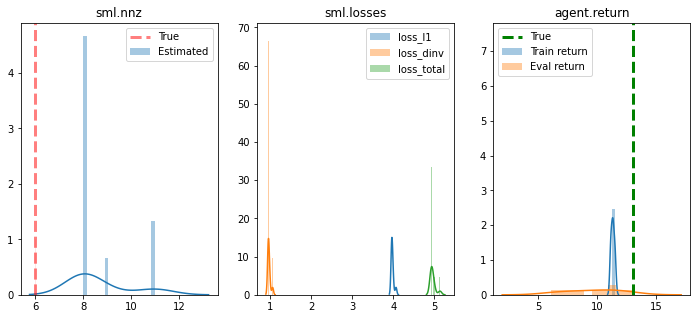

0.0

In [16]:
process_exps(exps)

In [17]:
def process_dimension(v_n=3):
    """Plot a chart and compute success ratios for seeds."""
    ratios = []
    for v_seed in uniq_vals["v_seed"]:
        exps = experiments[configs[(configs.v_seed == v_seed) & (configs.v_n == v_n)].index]
        plt.show()
        ratios.append(process_exps(exps))
    return ratios

Success ratio: 0.0%


/home/serge/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


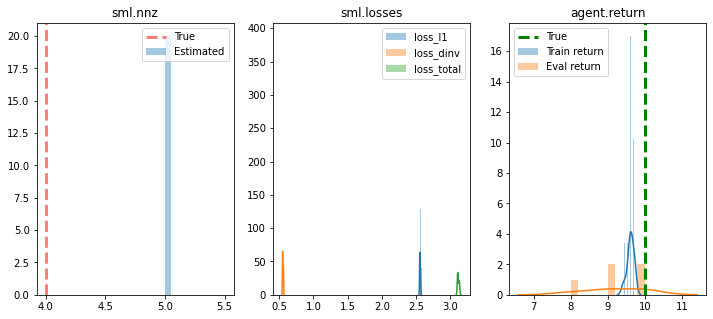

Success ratio: 0.0%


/home/serge/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


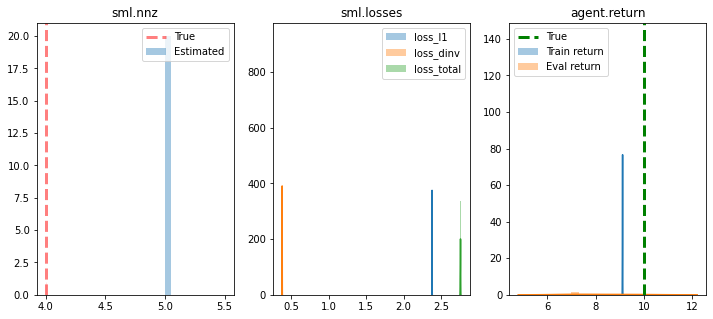

Success ratio: 0.0%


/home/serge/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


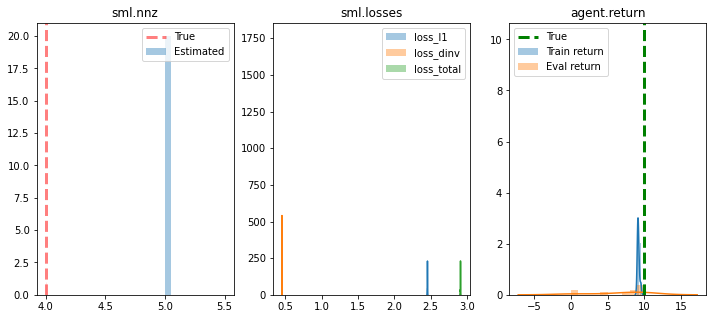

Success ratio: 0.0%


/home/serge/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


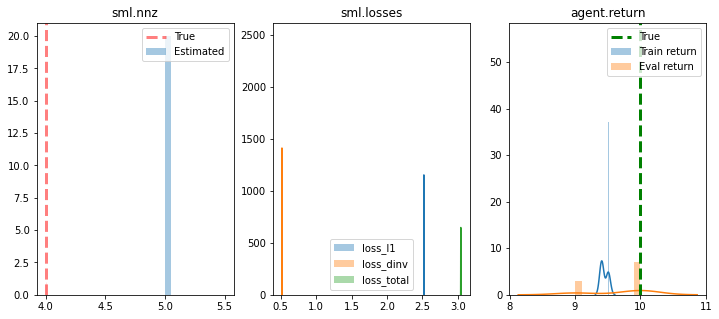

Success ratio: 0.0%


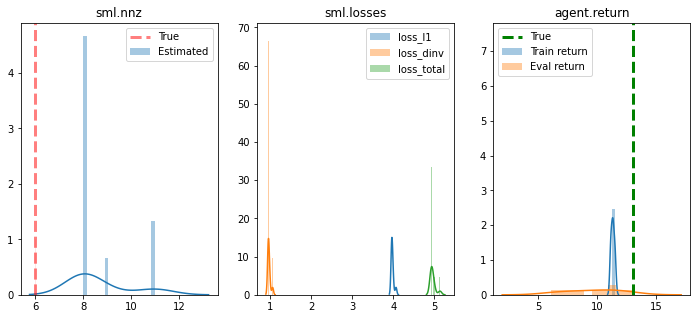

Success ratio: 0.0%


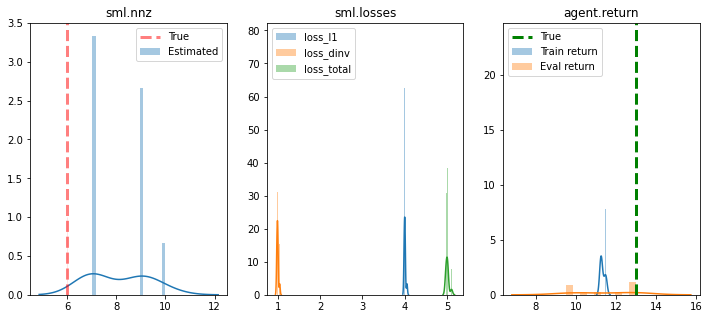

Success ratio: 50.0%


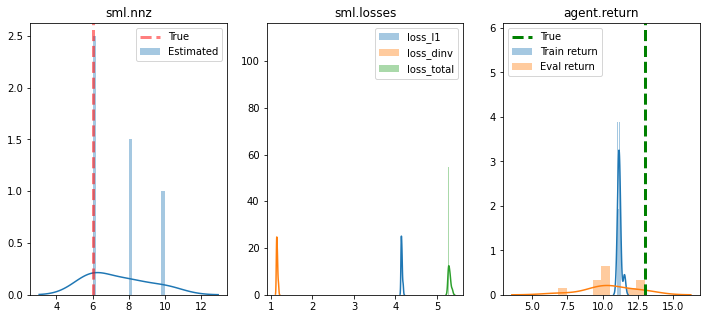

Success ratio: 0.0%


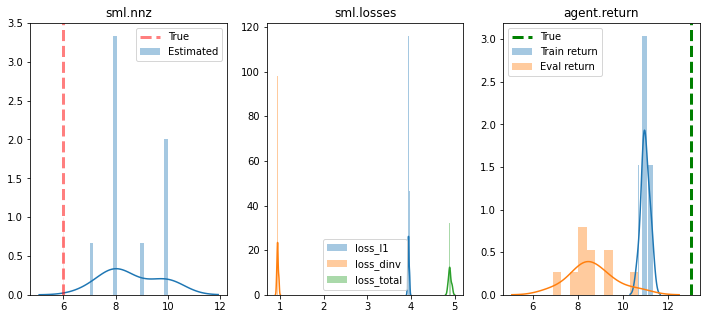

Success ratio: 0.0%


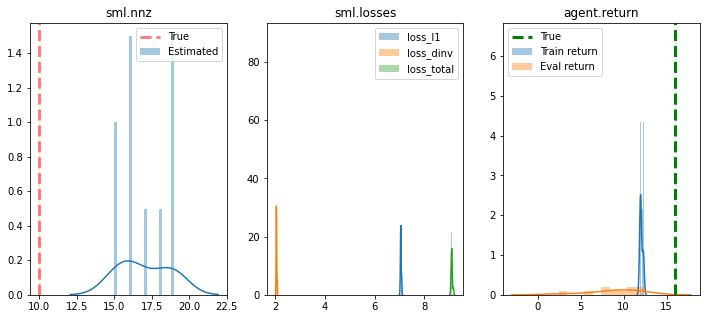

Success ratio: 0.0%


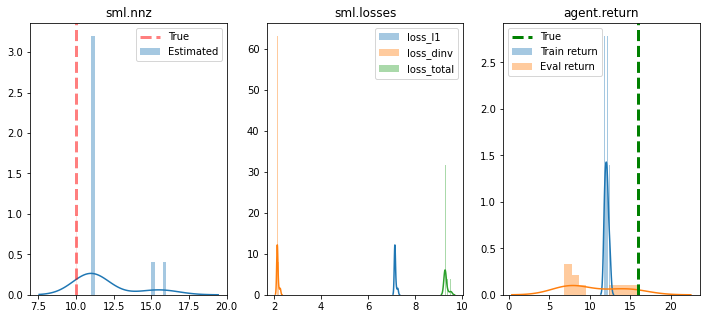

Success ratio: 20.0%


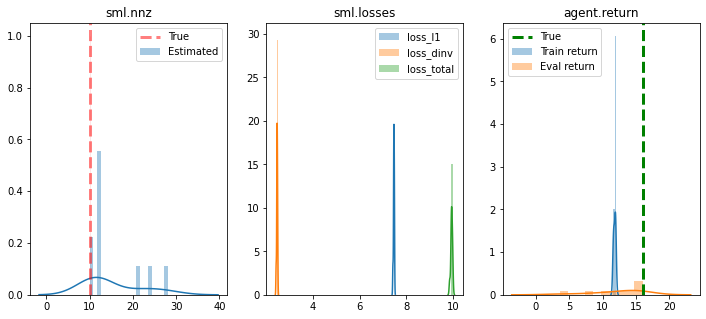

Success ratio: 0.0%


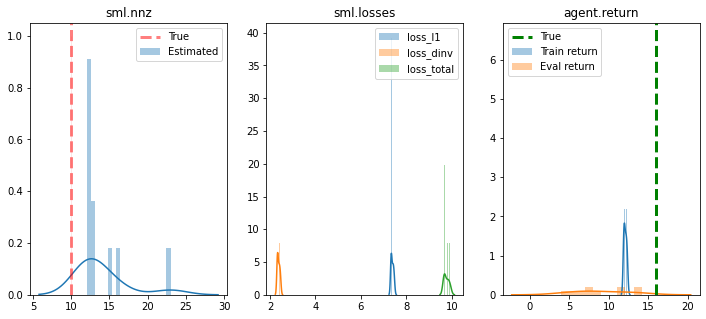

Success ratio: 0.0%


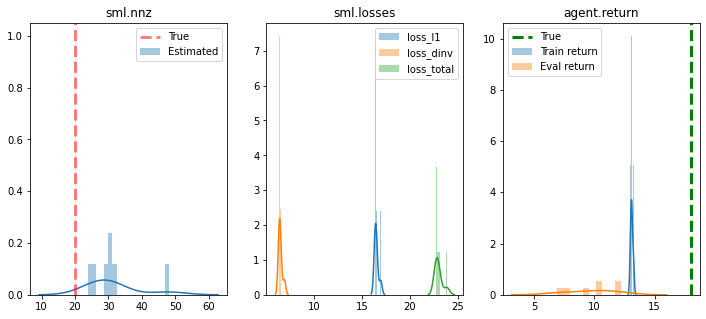

Success ratio: 0.0%


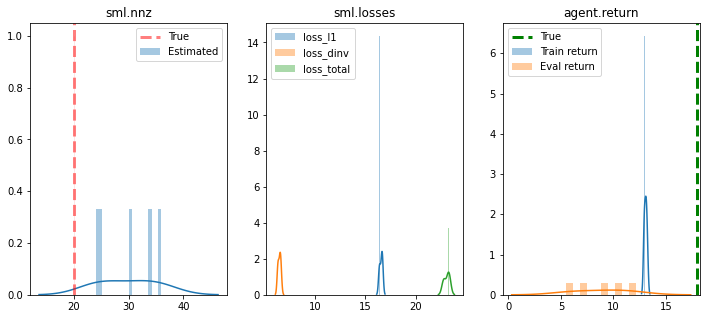

Success ratio: 0.0%


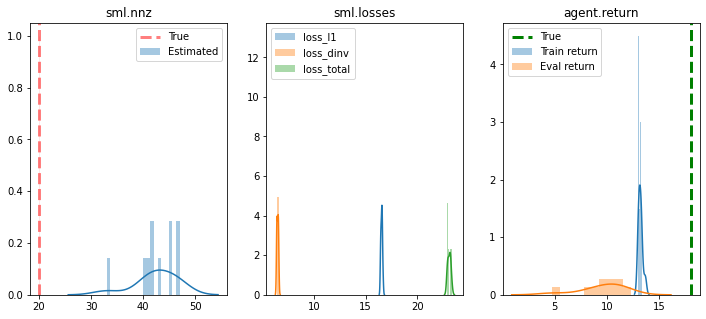

Success ratio: 0.0%


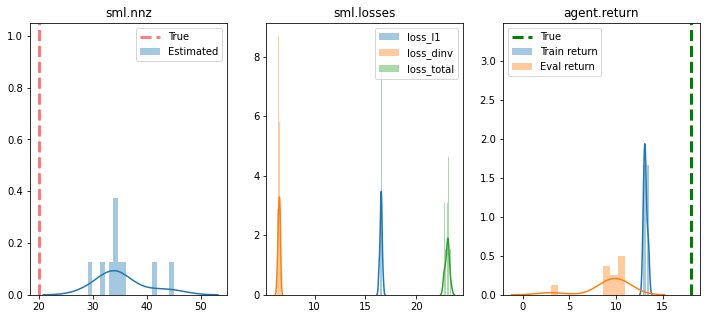

In [18]:
processed_for_val = {}
for v_n in uniq_vals["v_n"]:
    display(HTML('<h3>$v_n=%d$</h3>' % v_n))
    processed_for_val[v_n] = process_dimension(v_n)

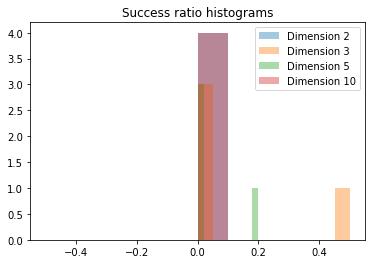

In [19]:
plt.title("Success ratio histograms")
for k in processed_for_val:
    plt.hist(processed_for_val[k], label="Dimension %d" % k, bins=10, alpha=0.4)
plt.legend()
plt.show()

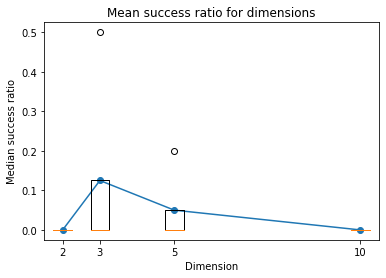

In [94]:
plt.title("Mean success ratio for dimensions")
plt.xlabel("Dimension")
plt.ylabel("Median success ratio")
xs = sorted(processed_for_val.keys())
ys_arr = [processed_for_val[x] for x in xs]
ys = [np.mean(y) for y in ys_arr]


plt.plot(xs, ys)
plt.scatter(xs, ys)
plt.boxplot(ys_arr, positions=xs)
plt.show()

# Analyzing one experiment

In [74]:
v_n = 5

# finding best by nnz
exps = [exp for exp in experiments if exp.config.v_n == v_n]
nnzs = [np.min(exp.metrics['sml.nnz'][-100:]) for exp in exps]
idx = np.argmax(nnzs) # CHANGE TO min()
exp = exps[idx]

In [75]:
sml = pickle.loads(exp.artifacts['sml'].content)
W = pickle.loads(exp.artifacts['W'].content)

## Causal learner info

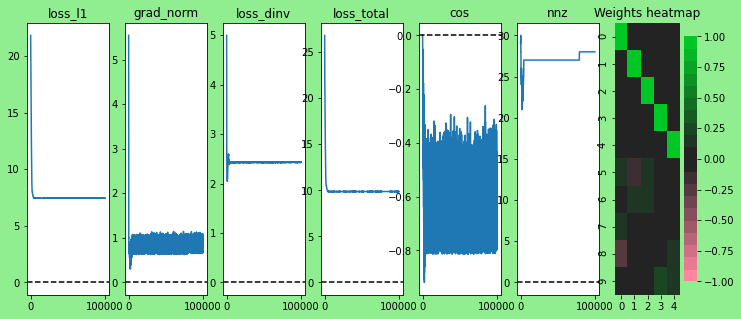

In [76]:
sml.process_results()

## Observation model loss

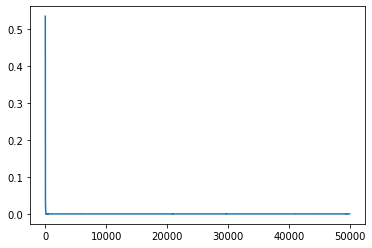

In [77]:
W.plot_loss()

# Final matrices

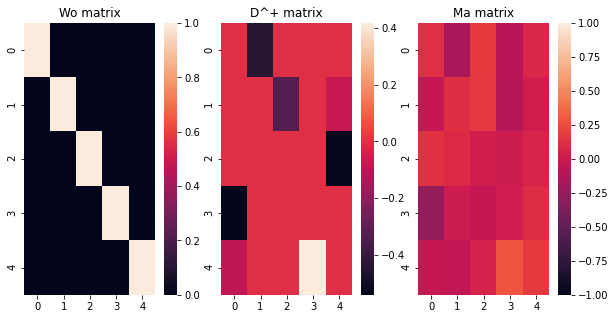

In [78]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Wo matrix")
sns.heatmap(W.get_Wo_Wa()[0])
plt.subplot(1, 3, 2)
plt.title("D^+ matrix")
sns.heatmap(np.linalg.pinv(sml.D.numpy()))
plt.subplot(1, 3, 3)
plt.title("Ma matrix")
sns.heatmap(sml.Ma, vmin=-1, vmax=1)

## Graphs for M, W

In [79]:
def select_threshold(M):
    """Select threshold for a matrix."""
    x = pd.DataFrame({'x': np.log(np.abs(M.flatten()))})
    kmeans = KMeans(n_clusters=2)
    kmeans.fit_transform(X=np.array(x.x).reshape((-1, 1)))
    x['label'] = kmeans.labels_
    clusters = np.argsort([np.min(df.x) for l, df in x.groupby('label')])
    l = np.max(x.x[x.label == clusters[0]])
    r = np.min(x.x[x.label == clusters[1]])
    assert l < r
    threshold = (l + r) / 2
    plt.title('Histogram of $|M_a|$ weights')
    plt.hist(x.x)
    plt.axvline(threshold, label='threshold')
    plt.legend()
    plt.show()
    return np.exp(threshold)

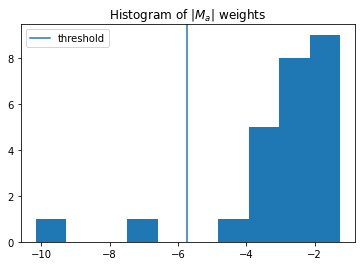

Number of edges: 28 out of 50, sparsity 44.00%


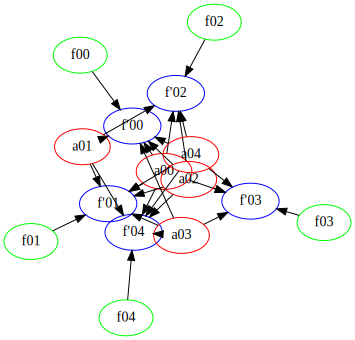

In [80]:
graph_M = graph_for_matrices(sml.Mf, sml.Ma, threshold=select_threshold(sml.Ma))
graph_M

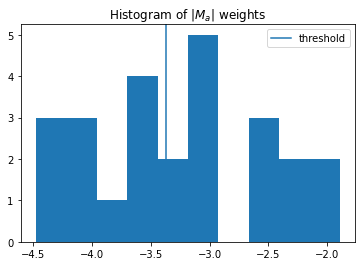

Number of edges: 19 out of 50, sparsity 62.00%


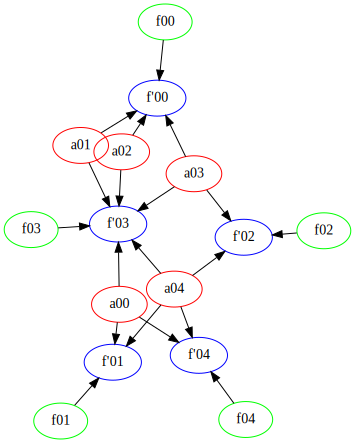

In [81]:
graph_W = graph_for_matrices(*W.get_Wo_Wa(), threshold=select_threshold(W.get_Wo_Wa()[1]))
graph_W

## Descent curve

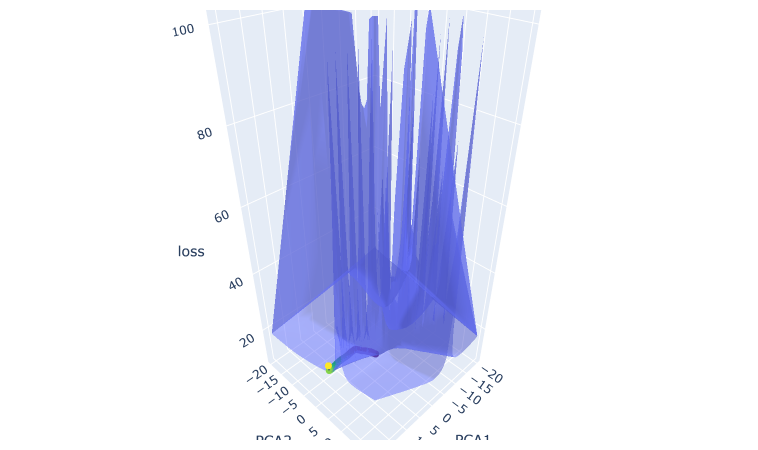

In [82]:
sml.weights_descent_pca_space(maxL=100)

## Agent info

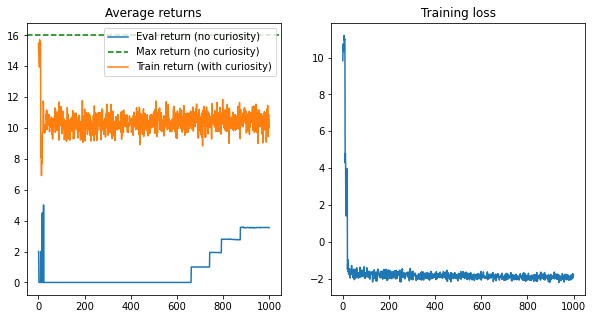

In [83]:
rew = hardcoded_agent_reward(exp.config["v_n"], exp.config["v_k"])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Average returns")
plt.plot(exp.metrics["agent.eval_return"], label="Eval return (no curiosity)")
plt.axhline(rew, ls="--", color="green", label="Max return (no curiosity)")
plt.plot(exp.metrics["agent.train_return"], label="Train return (with curiosity)")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Training loss")
plt.plot(exp.metrics["agent.train_loss"], label="Agent loss")

plt.show()

In [73]:
plt.show()